# Calculate e/m, the Charge-to-Mass ratio of the electron, $ \frac{e}{m_e} $ #

## Contents ##

* [Introduction](#1)<br>
* [Deriving a direct relationship between the voltage and the radius of the electrons](#2)<br>
* [Unweighted  Least Squares Fit Method](#3)<br>
* [Weighted Least Squares Fit Method](#4)<br>
* [Plotting Data vs Weighted Fit Line vs Unweighted Fit Line](#5)<br>
* [Calculating the values for the electron charge to mass ratio](#6)<br>

# <a id="1"></a>1) Introduction #

## The Aim of the notebook ##

In the following jupyter notebook we will be using both the numpy and matplotlib libraries to calculate the charge to mass ratio of the electron. We will be using experimental data given to us in "eovermdata2018.csv" to do this.

## The Experiment used to obtain the data ##

The experiment used to obtain this data was done by using a cathode ray tube was used to accelerate electrons through a voltage $ V $, where $ V $ is our independent variable [1]. These electrons will then follow a circular path as they are being accelerated by the voltage, $ V $. This electron beam is then forced to follow a circular path after being subjected to a magnetic field $ B $, where $ B = 1.28 \pm 0.001 \times 10^{-3} $ Tesla. This value has been inputed in the code below.

In [1]:
#Inputing the magnetic flux density value used for the experiment and the uncertainty
flux = 1.28*(10**(-3))
delta_flux = 0.01*(10**(-3))

# <a id="2"></a>2) Deriving a direct relationship between the voltage and the radius of the electrons#

In the following derivation for a relationship between the voltage and the radius of the electrons circular path we will be using equations given to us by the relationships of circular motion, magntism, and the conversion between potential and kinetic energy.

## <center>The force experienced by the electrons is given by:</center> ##
<br/>
<center>** Equation (1) **</center>
<br/>
$$ (F_r =) evB = \frac{m_e v^2}{r} $$
<br/>
## <center>The speed v of the electrons is given by:</center> ##
<br/>
<center>** Equation (2) **</center>
<br/>
$$  \frac{1}{2} m_e v^2 = e V $$
<br/>
##  <center>Derivation:</center> ##
<br/>
<center>Doubling (2)</center>
<br/>
$$ m_e v^2 = 2 e V $$
<br/>
<center>Subing the above equation in to (1)</center>
<br/>
$$ evB =  \frac{2 e V}{r} $$
<br/>
<center>removing the charge of the electron factor</center>
<br/>
$$ vB =  \frac{2 V}{r} $$
<br/>
<center>rearranging to get an equation for the speed of the electron</center>
<br/>
$$ v =  \frac{2 V}{B r} $$
<br/>
<center>Starting at equation (1)</center>
<br/>
$$ evB = \frac{m_e v^2}{r} $$
<br/>
<center>removing the factor of the speed</center>
<br/>
$$ eB = \frac{m_e v}{r} $$
<br/>
<center>rearranging the equation to get the radius of the electron path as the subject</center>
<br/>
$$ r = \frac{m_e}{eB}v $$
<br/>
<center>using our new equation for the speed of the electron as a substitution</center>
<br/>
$$ r = \frac{m_e}{eB}\frac{2 V}{B r} $$
<br/>
<center>Now multiplying by the radius to get an equation of the radius in terms of the applied voltage</center>
$$ r^2 = \frac{m_e}{e}\frac{2}{B^2}V $$<br>
<br/>
<center>** Equation (3) **</center>
<br/>
$$ r = \sqrt{\frac{m_e}{e}\frac{2}{B^2}V} $$<br>

Which is a direct linear relationship between $ r $ and $ \sqrt{V} $.


Below, we have used both numpy and matplotlib.pyplot to load in the data from the "eovermdata2018.csv" to create 3 arrays which we will be uding in our further calculations.

In [2]:
import numpy as np #Importing the Numpy Library.
import matplotlib.pyplot as plt #Importing the Matplotlib Library.

#Importing the CSV file into 3 seperate arrays.
#voltage in (volts), distance and delta_distance in (metres)
voltage, distance, delta_distance = np.loadtxt('eovermdata2018.csv', unpack=True, delimiter=",", skiprows=2)

#  <a id="3"></a>3) Unweighted  Least Squares Fit Method #

For the unweighted least squares fit method we simply use the following equations in order to find the gradient and y-intercept...<br><br>
<br/>
<center>** Equation (4) **</center>
<br/>

$$ m = \frac{\sum(x_i - \bar{x}) y_i}{\sum (x_i - \bar{x})^2} = \frac{\sum x_i (y_i - \bar{y})}{\sum x_i (x_i - \bar{x})} $$<br>
<br/>
<center>** Equation (5) **</center>
<br/>
$$ c = \bar{y} - m \bar{x} $$<br>

<center>Where...<br><br></center>
$$ \bar{x} = \frac{1}{n} \sum x_i$$<br>$$\bar{y} = \frac{1}{n} \sum y_i$$<br>

In order to calculate our uncertainties in our gradient and our y-intercept we will be using the following equations...<br><br>
<br/>
<center>** Equation (6) **</center>
<br/>
$$ \Delta m = \sqrt{\frac{\sum d_i^2}{D(n-2)}}$$<br>
<br/>
<center>** Equation (7) **</center>
<br/>
$$ \Delta c = \sqrt{(\frac{1}{n} + \frac{\bar{x}^2}{D})\frac{\sum d_i^2}{(n-2)}}$$<br>

<center>Where</center>
<br/>
<center>** Equation (8) **</center>
<br/>
$$ d_i = y_i - mx_i - c $$<br>
<br/>
<center>** Equation (9) **</center>
<br/>
$$ D = \sum x_i (x_i - \bar{x}) $$<br>
<br/>
<center>** Equation (10) **</center>
<br/>
$$ n = \frac{\sum{y_i}-m\sum{x_i}}{c} $$<br>

Below, we are defining some new variables that we will be using in further calculations. We have shortened some of the term names so that it is easier to implement.

In [3]:
v = voltage #shortening the name of the volatge array so that it is faster to implement in our programs
r = distance #y-axis values, rellabeling distance "r"
delta_r = delta_distance #y-axis uncertainty, rellabeling distance "r" uncertainty
root_v = np.sqrt(v) #x-axis values, rooting the voltage

Below, we have implemented the unweighted least squares fit method in order to calculate the gradient and the y-intercept.

In [4]:
#Fit the data using unweighted method
mean_root_v = np.mean(root_v) 
mean_r = np.mean(r)
m = np.sum((root_v - mean_root_v)*r) / np.sum((root_v - mean_root_v)*root_v) #Equation (4)
c = mean_r - m*mean_root_v #Equation (5)

Below, we have implemented the unweighted least squares fit method for calculating the uncertainties for the gradient and y-intercept.

In [5]:
di = r - m*root_v  - c #Equation (8)
D = np.sum((root_v  - mean_root_v )*root_v ) #Equation (9)
n = (np.sum(r) - m*np.sum(root_v))/c #Equation (10)
delta_m = np.sqrt((1/D)*(np.sum(di**2)/(n-2))) #Equation (6)
delta_c = np.sqrt(((1/n)+((mean_root_v**2)/D))*(np.sum(di**2)/(n-2))) #Equation (7)

# <a id="4"></a>4) Weighted Least Squares Fit Method #

A weighted least squares fit method is different from the unweighted version because it does not assume that all data points are equally valid. In practical scenarios it is common place to have the uncertainties for each data point vary. Data points with smaller uncertainties can be assumed to be more valid than those with larger uncertainties. In order to assign these values we use equation...<br>
<br/>
<center>** Equation (11) **</center>
<br/>
$$ w_i = \frac{1}{(\Delta y_i)^2} $$ <br>
Which assigns the weighting of a data point based on the uncertainty in its y-value.<br>
By using this weighting in our calculation of the gradient and y-intercept we now get that...<br><br>
<br/>
<center>** Equation (12) **</center>
<br/>
$$  m = \frac{\sum_i w_i \sum_i w_i x_i y_i - \sum_i w_i x_i \sum_i w_i
y_i}{\delta} $$
<center>and...</center><br>
<br/>
<center>** Equation (13) **</center>
<br/>
$$ c = \frac{\sum_i w_i x_i^2 \sum_i w_i y_i - \sum_i w_i x_i \sum_i w_i x_i y_i}{\delta} $$<br>
<center>Where...</center><br>
<br/>
<center>** Equation (14) **</center>
<br/>
$$ \delta = \sum_i w_i \sum_i w_i x_i^2 - \left(\sum_i w_i x_i \right)^2 $$<br>
For the uncertainties in the gradient and y-intercept the values are calculted through the following equations...<br><br>
<br/>
<center>** Equation (15) **</center>
<br/>
$$ \Delta m = \sqrt{ \frac{\sum_i w_i}{\delta}} $$
<br/>
<br/>
<center>** Equation (16) **</center>
<br/>
$$ \Delta c = \sqrt{ \frac{\sum_i x_i^2 w_i}{\delta}} $$

Below, we have implemented the weighted least squares fit method for calculating the uncertainties for the gradient and y-intercept.

In [6]:
w_i = 1 / (delta_r**2) #Equation (11)
delta = (np.sum(w_i)*np.sum(w_i*(root_v**2))) - np.sum(w_i*root_v)**2 #Equation (14)
m_i = ((np.sum(w_i)*np.sum(w_i*r*root_v)) - (np.sum(w_i*root_v)*np.sum(w_i*r))) / delta #Equation (12)
c_i = ((np.sum(w_i*(root_v**2))*np.sum(w_i*r)) - (np.sum(w_i*root_v)*np.sum(w_i*r*root_v))) / delta #Equation (13)
delta_m_i = np.sqrt(np.sum(w_i) / delta) #Equation (15)
delta_c_i = np.sqrt(np.sum(w_i*(root_v**2)) / delta) #Equation (16)

# <a id="5"></a>5) Plotting Data vs Weighted Fit Line vs Unweighted Fit Line #

In the following section we will be using the Matplotlib library as a way to plot the fitted lines we got through both weighted and unweighted least square fit methods and compare it to what our data shows us.

Below, we have setup both straight line equations for the weighted and unweighted leastsquare fit method. We have also set up a 2 element array which will be used by the straight line functions in order to plot the line equations calculated.

In [7]:
x = np.linspace(11,19,2) #Only need two points for a straight line
y = m*x + c #Setting up unweighted line equation
y_i = m_i*x + c_i #Setting up weighted line equation

Below, we have setup our figure where we will be showing the data and the straight line equations calculated. For the purpose of plotting the data I have chosen to use blue, green, and red as the colours for the 3 different plots on the figure. This makes it clear to see the different plots. For those who may suffer from color blindness though or trouble in seeing the colours, I have also made sure to use different line stlyes and include the legend in order to help people identify the data more clearly. At the bottom I have also included print functions which output the equations for the lines we are showing on the figure.

The line eqution for the...
Unweighted line is Y = 0.0026*X + 0.002
Weighted line is Y = 0.0024*X + 0.004


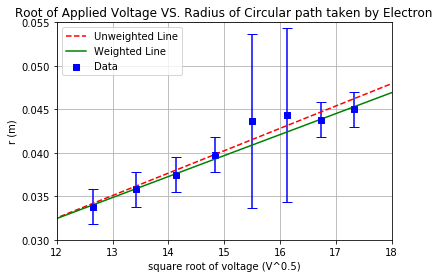

In [8]:
#Starting a new figure
plt.figure()
#Plottign the raw data given to us but with all values of the voltage square rooted
plt.scatter(root_v, r, label="Data", marker=",", c="b")
#Plotting the unweighted straight line using the values of m and c calculted in section 2
plt.plot(x, y, label="Unweighted Line", c="r", ls="--")
#Plotting the weighted straight line using the values of m_i and c_i calculted in section 3
plt.plot(x, y_i, label="Weighted Line", c="g")
#Plots a grip in the backdrop of the data to give reference for the user.
plt.grid(True)
#Gives a small key for the reader to easily tell what data is for which crystal.
plt.legend()
#Setting the title of graph.
plt.title("Root of Applied Voltage VS. Radius of Circular path taken by Electron")
#Setting the x-axis label.
plt.xlabel("square root of voltage (V^0.5)")
#Setting the y-axis label.
plt.ylabel("r (m)")
#Plotting the errorbars for the radius of the circular path and setting a cap so that the errorbars are more visible
plt.errorbar(root_v, r, yerr=delta_r,  capsize=5, fmt='bo')
#Setting the boundaries for which x values are shown on the figure
plt.xlim(12,18)
#Setting the boundaries for which y values are shown on the figure
plt.ylim(0.03,0.055)

#Setting up the print functions for the lines
print("The line eqution for the...")
print("Unweighted line is Y = {0:0.4f}*X + {1:0.3f}".format(m, c))
print("Weighted line is Y = {0:0.4f}*X + {1:0.3f}".format(m_i, c_i))

Below, the code is using print fuctions to show the calculated values for gradient, intercept and uncertainties at full precision, with units, for both the weighted and unweighted least squares method.

In [9]:
print("At full precision the following values were estimated using the unweighted least squares method...")
print("Gradient = {0}(m V^(-0.5))".format(m))
print("Intercept = {0}(m)".format(c))
print("Gradient Uncertainty = {0}(m V^(-0.5))".format(delta_m))
print("Intercept Uncertainty = {0}(m)".format(delta_c))
print("") #Empty print function to create a space between both calculations.
print("At full precision the following values were estimated using the weighted least squares method...")
print("Gradient = {0}(m V^(-0.5))".format(m_i))
print("Intercept = {0}(m)".format(c_i))
print("Gradient Uncertainty = {0}(m V^(-0.5))".format(delta_m_i))
print("Intercept Uncertainty = {0}(m)".format(delta_c_i))

At full precision the following values were estimated using the unweighted least squares method...
Gradient = 0.00257213107002745(m V^(-0.5))
Intercept = 0.0016521902515734058(m)
Gradient Uncertainty = 0.0002840734636075278(m V^(-0.5))
Intercept Uncertainty = 0.0043081873829923885(m)

At full precision the following values were estimated using the weighted least squares method...
Gradient = 0.002411350900928381(m V^(-0.5))
Intercept = 0.0035089059467933166(m)
Gradient Uncertainty = 0.0004832133168499581(m V^(-0.5))
Intercept Uncertainty = 0.007226975110543307(m)


# <a id="6"></a>6) Calculating the values for the electron charge to mass ratio #

Now that we have the values for the gradients for both the weighted and unweighted least squares method we can use the relationship derived in section 2, equation 3, between $ r $ and $ \sqrt{V} $ to get estimates for the charge to mass ratio. As we recall... <br><br>
$$ r = \left( \sqrt{\frac{m_e}{e}\frac{2}{B^2}} \right)\sqrt{V}  $$
<br>
Which can be rearranged to give that...<br>
<br/>
<center>** Equation (17) **</center>
<br/>
$$ \frac{e}{m_e} = \frac{2}{B^2 m^2} $$ <br><br>
Through using the general error propogation formula[3] we were able to derive that the following equation will be able to calculate the uncertainty in the electron charge to mass ratio...<br>
<br/>
<center>** Equation (18) **</center>
<br/>
$$ \Delta \left(\frac{e}{m_e}\right) = \frac{e}{m_e}\sqrt{\left(\frac{2 \Delta B}{B}\right)^2 + \left(\frac{2 \Delta m}{m}\right)^2} $$

Below, we have created a code block which will be calculating the values for the electron charge to mass ratio for both the weighted and unweighted least squares method, as well as the associated uncertainties.

In [10]:
em = 2 / ((flux*m)**2) #Equation (17) being applied for the unweighted least squares method
em_e11 = em/(10**11) #Formating the value for the ratio to the same as the excepted value
em_i = 2 / ((flux*m_i)**2) #Equation (17) being applied for the weighted least squares method
em_i_e11 = em_i/(10**11) #Formating the value for the ratio to the same as the excepted value
delta_em = em*np.sqrt(((2*delta_flux)/flux)**2 + ((2*delta_m)/m)**2)
delta_em_e11 = delta_em/(10**11) #Formating the value for the ratio uncertainty to the same as the excepted value
delta_em_i = em_i*np.sqrt(((2*delta_flux)/flux)**2 + ((2*delta_m_i)/m_i)**2)
delta_em_i_e11 = delta_em_i/(10**11) #Formating the value for the ratio uncertainty to the same as the excepted value

Below, the code is using print fuctions to show the calculated values for the electron charge to mass ratio, with units, for both the weighted and unweighted least squares method, with uncertainties.

In [11]:
print("Using the unweighted least squares method...")
print("Charge-Mass Ratio = ({0:0.1f} +/- {1:0.1f})×10^11 C/kg".format(em_e11, delta_em_e11))
print("") #Empty print function to create a space between both calculations.
print("Using the weighted least squares method...")
print("Charge-Mass Ratio = ({0:0.1f} +/- {1:0.1f})×10^11 C/kg".format(em_i_e11, delta_em_i_e11))

Using the unweighted least squares method...
Charge-Mass Ratio = (1.8 +/- 0.4)×10^11 C/kg

Using the weighted least squares method...
Charge-Mass Ratio = (2.1 +/- 0.8)×10^11 C/kg


## Conclusion ##

In conclusion when comparing the 2 values it is clear to see that the unweighted method yields a result closer to that of the true accepted value, $ (1.75882002 ± 0.00000001) × 10^{11} C/kg $, whilst the weighted produces a value further away. It is important to notice that both uncertainties in the calculated values do account for the accepted value which suggests that both methods are good. One could say that the unweighted has yielded the better result though since not only is it more accurate but also more precise with the uncertainty being roughly half that of the weighted method.

## Refrences ##

[1]Dr Louise Dash, PHAS0007-ReadingWeek-eoverm.pdf (Revised November 1st 2018 Edition), Page 2<br>
[2]Ifan G. Hughes and Thomas P. A. Hase, Measurements and their Uncertainties, Page 64<br>
[3]Ifan G. Hughes and Thomas P. A. Hase, Measurements and their Uncertainties, Page 51